## Exercise 1

In [29]:
# write the functions for PMF and CDF
n <- 14
p <- 0.15

ztb_pdf <- function(k, n, p) {
    choose(n, k)*p**k * (1-p)**(n-k) / (1-(1-p)**n)
}

ztb_cdf <- function(x, n, p) {
    arr <- 1:x
 sum(sapply(arr, function(k) ztb_pdf(k, n, p)))
 }

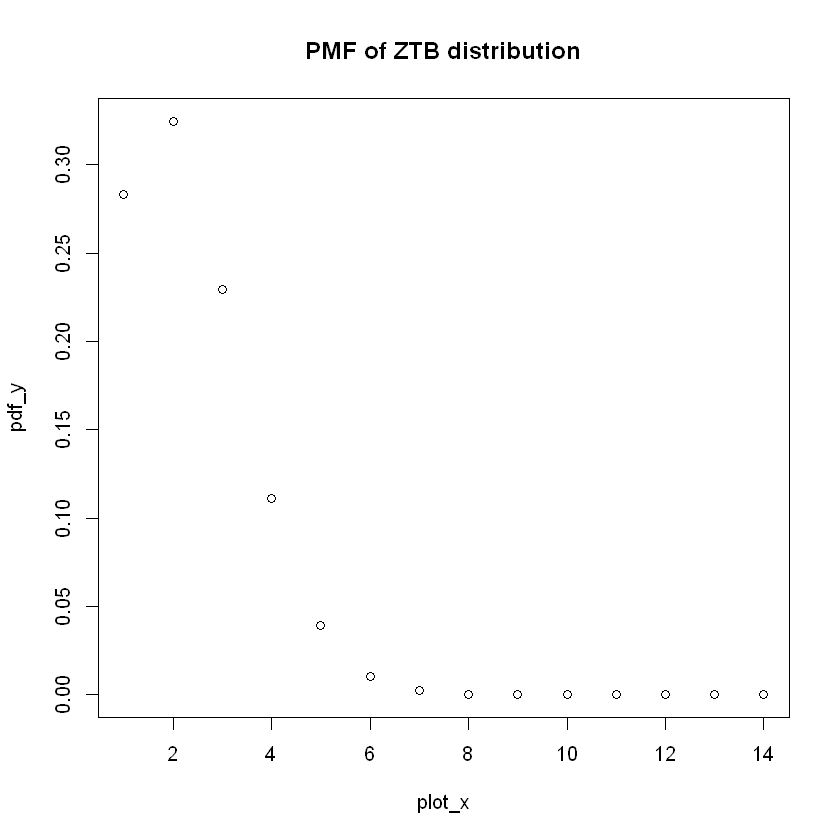

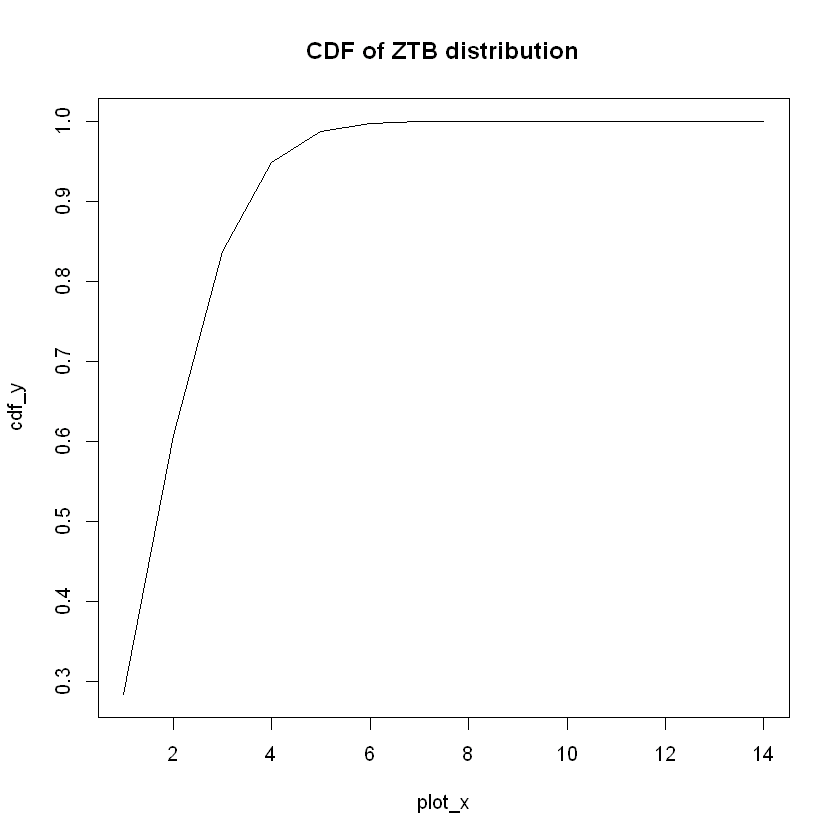

In [30]:
# produce two plots
plot_x <- 1:n
pdf_y <- sapply(plot_x, function(x) ztb_pdf(x, n, p))
cdf_y <- sapply(plot_x, function(x) ztb_cdf(x, n, p))

plot(plot_x, pdf_y, main = "PMF of ZTB distribution")
plot(plot_x, cdf_y, type = "l", main = "CDF of ZTB distribution")

In [31]:
# compute the mean and variance, compare with the analytical statistical moments
mean_binom <- n*p
var_binom <- n*p*(1-p)

mean_ztb <- sum(plot_x * pdf_y)
var_ztb <- sum((plot_x - mean_ztb)**2 * pdf_y)

cat("Std binomial mean:", mean_binom, " variance:", var_binom)
cat("\nZTB mean:", mean_ztb, " variance:", var_ztb)

Std binomial mean: 2.1  variance: 1.785
ZTB mean: 2.340536  variance: 1.426472

sample mean: 2.366

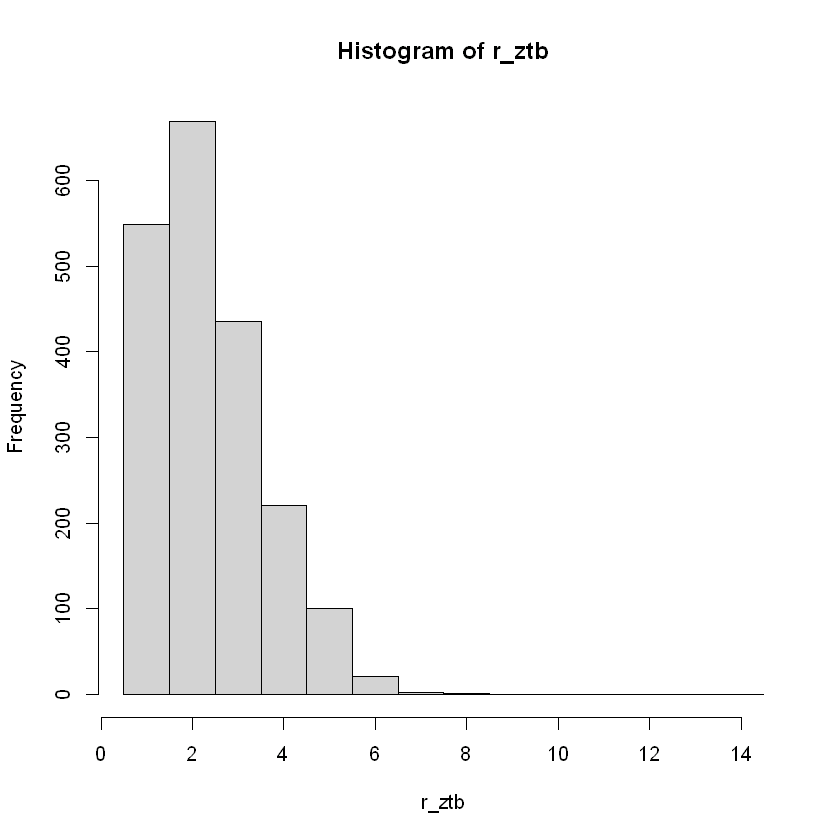

In [35]:
# generate a sample of random numbers, show in a histogram and evaluate the sample mean

#use inverse transform sampling method (since we already know the cdf values)

nsamples <- 2000

sample_ztb_inverse <- function(cdf_y, nsamples) {
    u <- runif(nsamples)
    sapply(u, function(ui) which(cdf_y >= ui)[1])
}

r_ztb <- sample_ztb_inverse(cdf_y, nsamples)

hist(r_ztb, breaks = seq(0.5, n + 0.5, 1))

cat("sample mean:", mean(r_ztb))

## Exercise 2

In [ ]:
# compute the normalization factor
E0 <- 7.25
gamma <- 2.7

#break the integral in two parts: from 0 to E0, and form E0 to infinity
int1 <- E0
int2 <- integrate(function(E) (E - E0 + 1)^(-gamma),lower = E0, upper = Inf)$value
N <- 1/(int1 + int2)

cat("Normalization factor N: ", N)

pdf_cr <- function(E, E0, gamma, N) {
    ifelse(E < E0, N, N * (E - E0 + 1)^(-gamma))
}

N2 <- 1/(integrate(function(E) pdf_cr(E, E0, gamma, 1), lower = 0, upper = Inf)$value)


Normalization factor N:  0.1275797Normalization factor N:  0.1275797

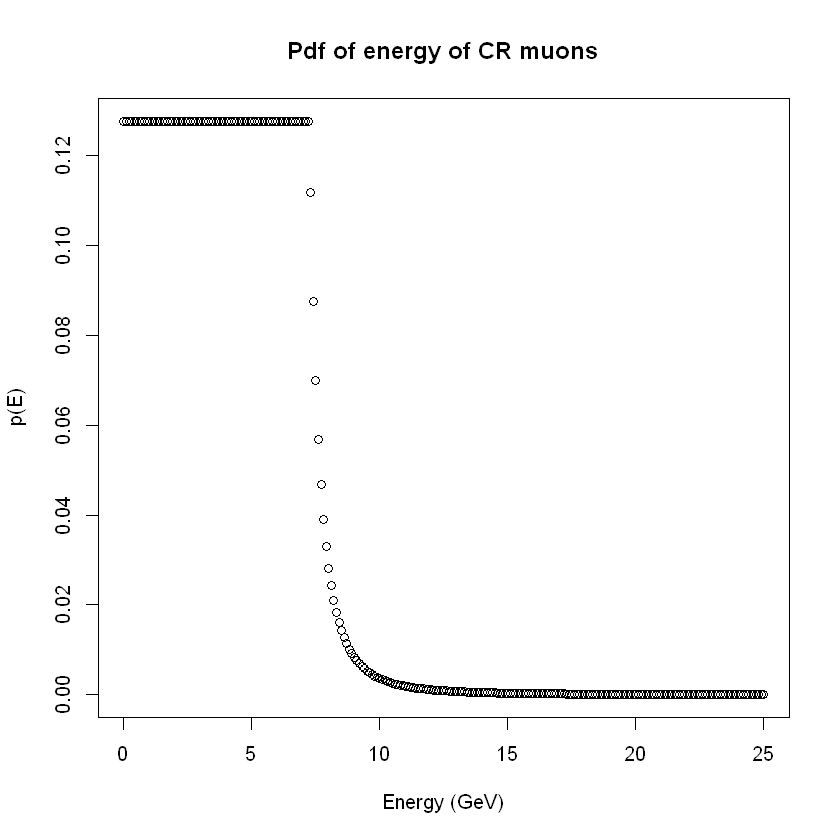

In [49]:
# plot the pdf

x_vals <- seq(0, 25, 0.1)
pdf_vals <- sapply(x_vals, function(x) pdf_cr(x, E0, gamma, N))

plot(x_vals, pdf_vals, main = "Pdf of energy of CR muons", xlab = "Energy (GeV)", ylab = "p(E)")

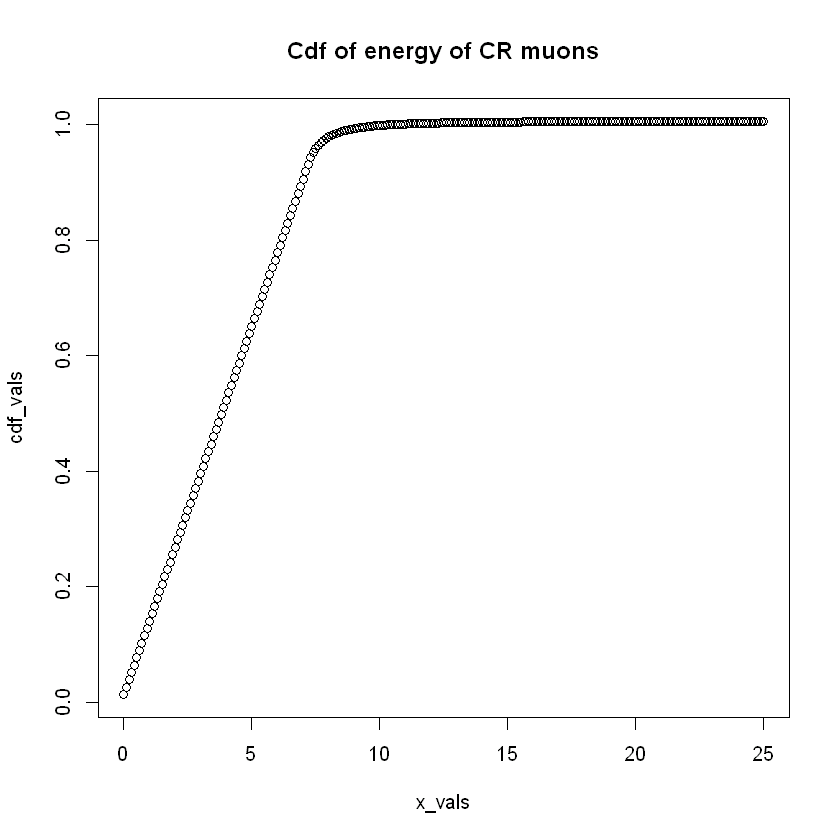

In [50]:
# plot the cdf
cdf_vals <- cumsum(pdf_vals)*0.1
plot(x_vals, cdf_vals, main = "Cdf of energy of CR muons")

In [56]:
# compute the mean
meanv <- integrate(function(E) E*pdf_cr(E, E0, gamma, N), lower = 0, upper = Inf)$value

cat("Mean value: ", meanv, "GeV")

Mean value:  4.004252 GeV

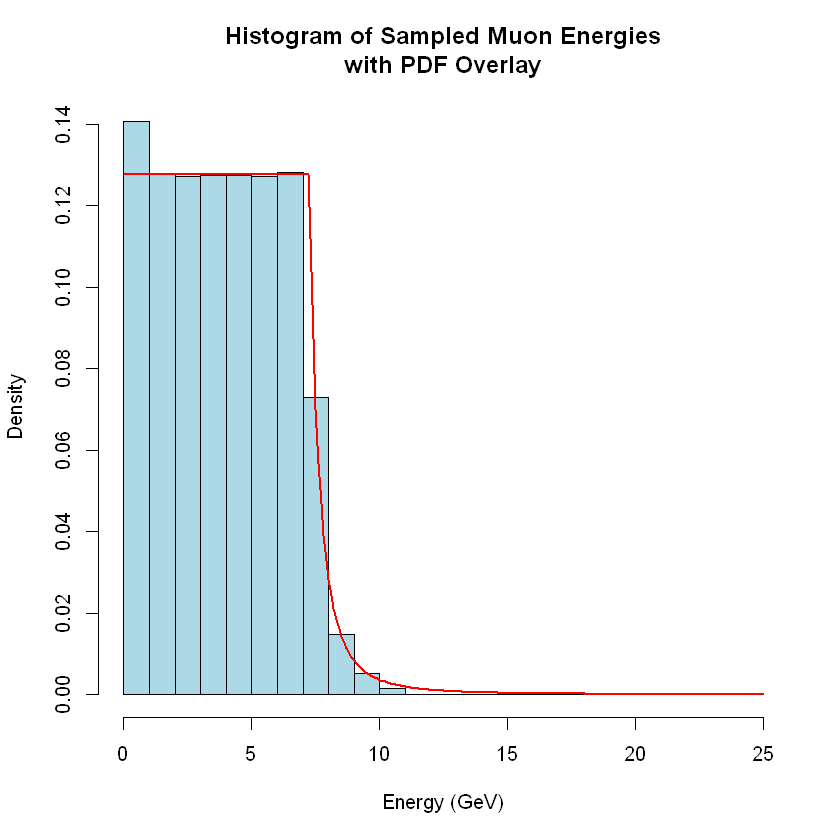

In [62]:
# generate 10^6 random numbers, show in a histogram and superimpose the pdf
nsamples <- 10^6
inverse_sampling_cr <- function(nsamples, cdf_vals, x_vals){
    u <- runif(nsamples)
    idx <- sapply(u, function(ui) which(cdf_vals >= ui)[1])
    x_vals[idx]
}

r_muons <- inverse_sampling_cr(nsamples, cdf_vals, x_vals)

hist(r_muons, breaks = seq(0, 25, 1), probability = TRUE,
     col = "lightblue",
     main = "Histogram of Sampled Muon Energies\nwith PDF Overlay",
     xlab = "Energy (GeV)")
lines(x_vals, pdf_vals, col = "red", lwd = 2)


## Exercise 3

In [64]:
# find a bound that at least 30 web server requests occur tomorrow
mn <- 7

#using markov inequality

bound <- mn/30

cat("Upper bound using Markov inequality: P(X>=30)<=", bound)

Upper bound using Markov inequality: P(X>=30)<= 0.2333333

In [65]:
# under regular conditions, it can be modeled as poisson process,
# calculate the probability that at least 30 requests occur tomorrow
cat("Probability assuming Poisson process: P(X>=30)=", 1-ppois(29, mn))

Probability assuming Poisson process: P(X>=30)= 9.982992e-11

In [66]:
# let the variance be 5, find a bound that at least 30 requests occur tomorrow
vr <- 5

#use cherbyshev inequality

bound2 <- vr^2/(30-mn)^2
cat("Upper bound using Cherbyshev inequality: P(X>=30)<=", bound2)

Upper bound using Cherbyshev inequality: P(X>=30)<= 0.04725898

## Exercise 4

In [77]:
# average 350 photons per second, std 75
# how many minutes to collect 1 million signals with confidence 95%
avg <- 350
sig <- 75

#since collecting a photon is a bernoulli process,
# it could be modeled as a poisson distribution,
# but mean and var are different and very large -> approximate with normal


target_photons <- 1e6
z_val <- qnorm(0.95, lower.tail = FALSE)

solve_time <- function(t) {
  avg * t + z_val * sig * sqrt(t) - target_photons
}

t_sol <- uniroot(solve_time, c(1000, 1000000))$root

t_min <- t_sol / 60

cat("Minutes needed:", t_min, "\n")

Minutes needed: 47.93409 


## Exercise 5

In [96]:
# 1000 persons, 5 people know a rumor, rumor spreads randomly
# simulate how rumor spreads over 15 interactions
ntot <- 1000
nini <- 5
niter <- 15
simulations <- 100

simulate <- function(ntot, nini, niter){
    informed <- rep(FALSE, ntot)
    informed[sample(1:ntot, nini)] <- TRUE

    for(iter in 1:niter) {
        idx_informed <- which(informed)
        for(idx in idx_informed) {
            informed[sample(1:ntot,1)] <- TRUE
        }
    }
    sum(informed)   #return the final number of informed people
}

sim_results <- replicate(simulations, simulate(ntot, nini, niter))

In [97]:
# evaluate the mean people know the rumor after 15 interactions
mn_sim <- mean(sim_results)
cat("Mean number of people know the rumor after", niter, "interactions over", simulations, "simulations: ", mn_sim)

Mean number of people know the rumor after 15 interactions over 100 simulations:  999.19

In [100]:
# find a bound of at least 500 person know the rumor after 15 interactions
#use markov inequality
bound_rumor <- mn_sim/500

cat("Upper bound using Markov inequality: P(X>=500)<=", bound_rumor)

cat("\nprobability higher than 1!!!!")

Upper bound using Markov inequality: P(X>=500)<= 1.99838


probability higher than 1!!!!

## Exercise 6

In [102]:
# a passenger gets on the bus on average every 30 seconds
# compute the probability of getting more than 6 passenger after 2 minutes
# evaluate the probability of having less than 4 passenger after 3 minutes

lambda <- 2 #passenger per minute

#poisson process
avg_2min <- 2*lambda
avg_3min <- 3*lambda

cat("Probability of getting more than 6 passenger after 2 minutes:", 1-ppois(6, avg_2min))
cat("\nProbability of having less than 4 passenger after 3 minutes:", ppois(3, avg_3min))


Probability of getting more than 6 passenger after 2 minutes: 0.110674


Probability of having less than 4 passenger after 3 minutes: 0.1512039

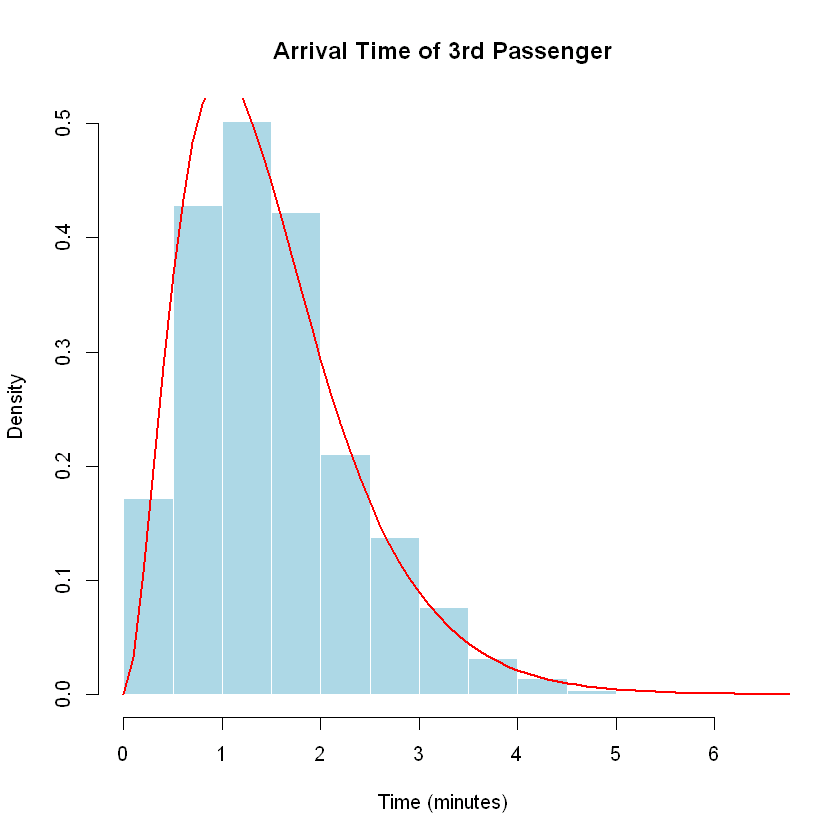

In [111]:
# simulate the distribution of arrival time of third passenger and superimpose the pdf
#use gamma distribution
nsamples <- 10^3

simulated_pts <- rgamma(nsamples, shape = 3, rate = lambda)

hist(simulated_pts, breaks = 20, probability = TRUE,
     main = "Arrival Time of 3rd Passenger",
     xlab = "Time (minutes)", col = "lightblue", border = "white")

curve(dgamma(x, shape = 3, rate = lambda), from = 0, to = 10, col = "red", lwd = 2, add = TRUE)


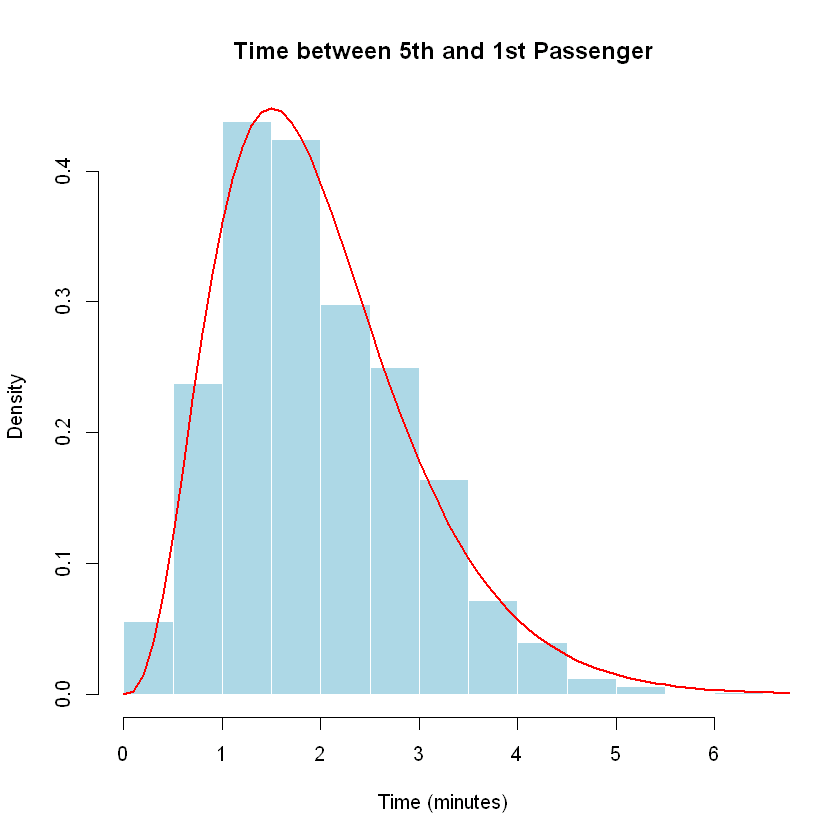

In [ ]:
# repeat for the difference in time between 5th and 1st passenger
# the time between 5th and 1st is distributed as the time to wait for the 4th event (memory-less)

simulated_pts <- rgamma(nsamples, shape = 4, rate = lambda)

hist(simulated_pts, breaks = 20, probability = TRUE,
     main = "Time between 5th and 1st Passenger",
     xlab = "Time (minutes)", col = "lightblue", border = "white")

curve(dgamma(x, shape = 4, rate = lambda), from = 0, to = 10, col = "red", lwd = 2, add = TRUE)
